<a href="https://colab.research.google.com/github/bharath191004/bharath/blob/main/covid.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Which type of graph do you want to see the COVID-19 deaths data as?

1 = Bar graph
2 = Pie chart
3 = Boxplot
4 = Histogram
5 = Line graph
6 = Scatter plot
7 = Area chart

Enter the number corresponding to the graph type: 6


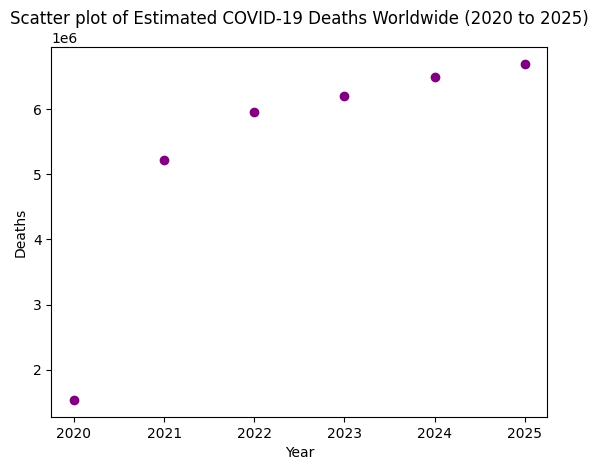

Downloading...
From: https://drive.google.com/uc?id=1Jcblu4Y4DTJnegqt8Z6U96UlI4QlJhsg
To: /content/covid_deaths_by_country_age.xlsx
100%|██████████| 5.13k/5.13k [00:00<00:00, 8.19MB/s]


Loading data into pandas DataFrame...

Columns in dataset: ['Country', 'AgeGroup', 'Deaths']

Sample aggregated data:
  Country Age Group  Deaths
0  Brazil      0-19    2000
1  Brazil     20-59   25000
2  Brazil       60+   70000
3   India      0-19    3000
4   India     20-59   35000
5   India       60+   90000
6     USA      0-19    5000
7     USA     20-59   45000
8     USA       60+  120000


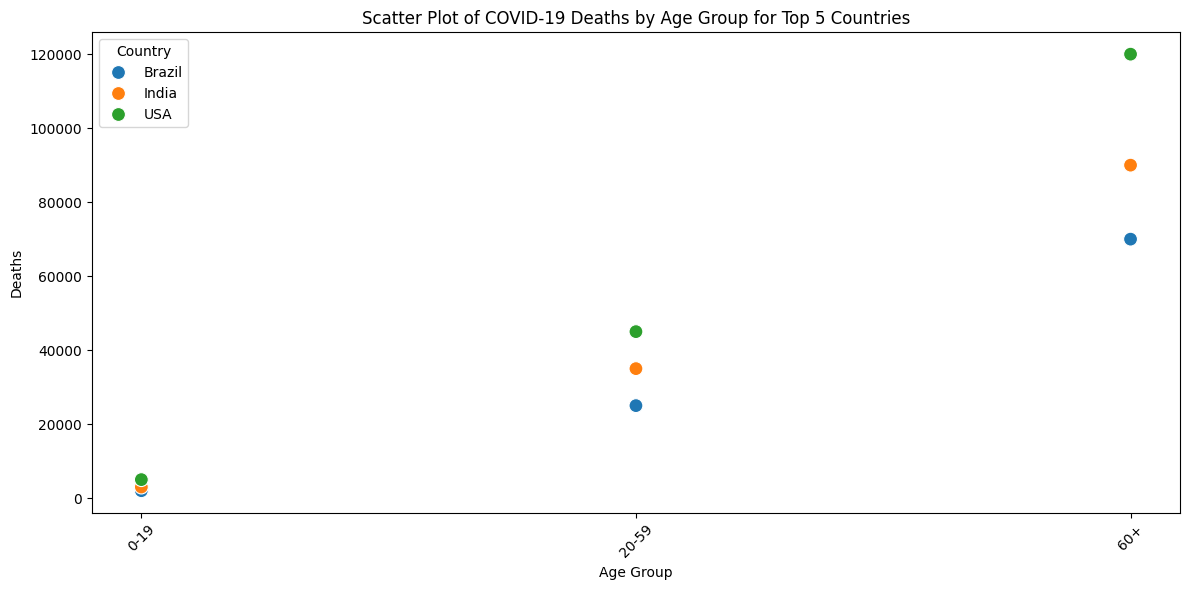

Visualizations complete. You can customize further as needed.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gdown

# Part 1: Estimated COVID-19 Deaths Worldwide Dataset

data = {
    'year': [2020, 2021, 2022, 2023, 2024, 2025],
    'deaths': [1532840, 5215745, 5954004, 6200000, 6500000, 6700000]
}

df_global = pd.DataFrame(data)

# Menu for graph options
print("Which type of graph do you want to see the COVID-19 deaths data as?\n")
graph_menu = (
    "1 = Bar graph\n"
    "2 = Pie chart\n"
    "3 = Boxplot\n"
    "4 = Histogram\n"
    "5 = Line graph\n"
    "6 = Scatter plot\n"
    "7 = Area chart\n"
)
print(graph_menu)

try:
    choice = int(input("Enter the number corresponding to the graph type: "))
except ValueError:
    print("Invalid input. Please enter a number between 1 and 7.")
    exit()

# Plotting the global estimated deaths data
def plot_global(choice):
    if choice == 1:
        plt.bar(df_global['year'], df_global['deaths'], color='red')
        plt.title('Estimated COVID-19 Deaths Worldwide (2020 to 2025)')
        plt.xlabel('Year')
        plt.ylabel('Deaths')
        plt.xticks(df_global['year'])
        plt.show()

    elif choice == 2:
        plt.pie(df_global['deaths'], labels=df_global['year'], autopct='%1.1f%%', shadow=True, explode=[0]*5+[0.1])
        plt.title('Distribution of Estimated COVID-19 Deaths Worldwide (2020 to 2025)')
        plt.legend()
        plt.show()

    elif choice == 3:
        plt.boxplot(df_global['deaths'])
        plt.title('Boxplot of Estimated COVID-19 Deaths Worldwide (2020 to 2025)')
        plt.ylabel('Deaths')
        plt.show()

    elif choice == 4:
        plt.hist(df_global['deaths'], bins=len(df_global), edgecolor='black', rwidth=0.8)
        plt.title('Histogram of Estimated COVID-19 Deaths Worldwide (2020 to 2025)')
        plt.xlabel('Deaths')
        plt.ylabel('Frequency')
        plt.show()

    elif choice == 5:
        plt.plot(df_global['year'], df_global['deaths'], marker='o', linestyle='-')
        plt.title('Trend of Estimated COVID-19 Deaths Worldwide (2020 to 2025)')
        plt.xlabel('Year')
        plt.ylabel('Deaths')
        plt.xticks(df_global['year'])
        plt.show()

    elif choice == 6:
        plt.scatter(df_global['year'], df_global['deaths'], color='purple')
        plt.title('Scatter plot of Estimated COVID-19 Deaths Worldwide (2020 to 2025)')
        plt.xlabel('Year')
        plt.ylabel('Deaths')
        plt.xticks(df_global['year'])
        plt.show()

    elif choice == 7:
        plt.fill_between(df_global['year'], df_global['deaths'], color='skyblue', alpha=0.5)
        plt.plot(df_global['year'], df_global['deaths'], marker='o', color='Slateblue', alpha=0.6)
        plt.title('Area Chart of Estimated COVID-19 Deaths Worldwide (2020 to 2025)')
        plt.xlabel('Year')
        plt.ylabel('Deaths')
        plt.xticks(df_global['year'])
        plt.show()

    else:
        print("Invalid input. Please enter a number between 1 and 7.")

plot_global(choice)

# Part 2: Download and visualize detailed deaths by country and age group

url = "https://drive.google.com/uc?id=1Jcblu4Y4DTJnegqt8Z6U96UlI4QlJhsg"
output_file = "covid_deaths_by_country_age.xlsx"

print("\nDownloading detailed COVID-19 deaths data by country and age group...")
gdown.download(url, output_file, quiet=False)

print("Loading data into pandas DataFrame...")
df_detailed = pd.read_excel(output_file)

print("\nColumns in dataset:", df_detailed.columns.tolist())

# Clean and standardize column names
df_detailed.columns = df_detailed.columns.str.strip()
df_detailed = df_detailed.rename(columns={'AgeGroup': 'Age Group'})

if not {'Country', 'Age Group', 'Deaths'}.issubset(df_detailed.columns):
    print("Error: The dataset must contain the columns: 'Country', 'Age Group', and 'Deaths'")
    exit()

df_clean = df_detailed.dropna(subset=['Country', 'Age Group', 'Deaths'])
df_clean['Deaths'] = pd.to_numeric(df_clean['Deaths'], errors='coerce')
df_clean = df_clean.dropna(subset=['Deaths'])

agg_data = df_clean.groupby(['Country', 'Age Group'])['Deaths'].sum().reset_index()

print("\nSample aggregated data:")
print(agg_data.head(10))

# Visualization function for detailed data with the same graph choice

def plot_detailed(choice):
    # Focus on top 5 countries by total deaths
    top_countries = agg_data.groupby('Country')['Deaths'].sum().nlargest(5).index.tolist()
    plot_data = agg_data[agg_data['Country'].isin(top_countries)]

    if choice == 1:  # Bar graph (grouped by age and country)
        plt.figure(figsize=(14, 8))
        sns.barplot(data=plot_data, x='Age Group', y='Deaths', hue='Country')
        plt.title('COVID-19 Deaths by Age Group for Top 5 Countries')
        plt.xlabel('Age Group')
        plt.ylabel('Number of Deaths')
        plt.legend(title='Country')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    elif choice == 2:  # Pie chart per country (show only top country total deaths)
        top_country = top_countries[0]
        data_pie = agg_data[agg_data['Country'] == top_country]
        plt.figure(figsize=(8, 8))
        plt.pie(data_pie['Deaths'], labels=data_pie['Age Group'], autopct='%1.1f%%', shadow=True)
        plt.title(f'Age Group Distribution of COVID-19 Deaths in {top_country}')
        plt.legend()
        plt.show()

    elif choice == 3:  # Boxplot of deaths by age group (all top countries)
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=plot_data, x='Age Group', y='Deaths')
        plt.title('Boxplot of COVID-19 Deaths by Age Group for Top 5 Countries')
        plt.xlabel('Age Group')
        plt.ylabel('Deaths')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    elif choice == 4:  # Histogram of deaths (all top countries)
        plt.figure(figsize=(10, 6))
        plt.hist(plot_data['Deaths'], bins=10, edgecolor='black', rwidth=0.8)
        plt.title('Histogram of COVID-19 Death Counts by Age Group (Top 5 Countries)')
        plt.xlabel('Deaths')
        plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()

    elif choice == 5:  # Line graph - deaths by age group summed over countries (age group trend)
        agg_age = plot_data.groupby('Age Group')['Deaths'].sum().reset_index()
        plt.figure(figsize=(12, 6))
        plt.plot(agg_age['Age Group'], agg_age['Deaths'], marker='o')
        plt.title('Trend of COVID-19 Deaths by Age Group (Summed Top 5 Countries)')
        plt.xlabel('Age Group')
        plt.ylabel('Deaths')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    elif choice == 6:  # Scatter plot - deaths by age group for top countries
        plt.figure(figsize=(12, 6))
        sns.scatterplot(data=plot_data, x='Age Group', y='Deaths', hue='Country', s=100)
        plt.title('Scatter Plot of COVID-19 Deaths by Age Group for Top 5 Countries')
        plt.xlabel('Age Group')
        plt.ylabel('Deaths')
        plt.xticks(rotation=45)
        plt.legend(title='Country')
        plt.tight_layout()
        plt.show()

    elif choice == 7:  # Area chart - deaths by age group summed over countries
        agg_age = plot_data.groupby('Age Group')['Deaths'].sum().reset_index()
        plt.figure(figsize=(12, 6))
        plt.fill_between(agg_age['Age Group'], agg_age['Deaths'], color='skyblue', alpha=0.5)
        plt.plot(agg_age['Age Group'], agg_age['Deaths'], marker='o', color='Slateblue', alpha=0.6)
        plt.title('Area Chart of COVID-19 Deaths by Age Group (Summed Top 5 Countries)')
        plt.xlabel('Age Group')
        plt.ylabel('Deaths')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    else:
        print("Detailed data visualization: invalid choice.")

plot_detailed(choice)

print("Visualizations complete. You can customize further as needed.")
